# Twin-Causal-Net Example
***
The following notebook shows how to use the `twincausal` *Python* library.

#### Import the libraries and generate synthetic uplift data

In [1]:
import twincausal.utils.data as twindata
from twincausal.model import twin_causal
from sklearn.model_selection import train_test_split
from twincausal.utils.performance import qini_curve, qini_barplot

In [2]:
X, T, Y = twindata.generator(5)  # Generate fake uplift data

True adjusted Qini: 1.4619335919810603
True Risk: 5.2


In [3]:
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.3, random_state=1234)

#### Initialize the model

In [4]:
input_size = X.shape[1] + 1  # Number of features + 1 (for treatment indicator)

In [5]:
uplift = twin_causal(input_size=input_size, hlayers=1, nb_neurons=256, lrelu_slope=0, batch_size=256, 
                     shuffle=True, max_iter=100, learningRate=0.005, reg_type=1, l_reg_constant=0.001, 
                     prune=True, gpl_reg_constant=0.0001, loss="uplift_loss", learningCurves=True, 
                     save_model=False, verbose=False, logs=False, random_state=1234)

In [6]:
uplift

twin_causal(
  (fc_layer): LinearProximal(in_features=101, out_features=256, bias=True)
  (fc_output): LinearProximal(in_features=256, out_features=1, bias=True)
)

#### Fitting the model

input_size               101         
hlayers                  1           
lrelu_slope              0           
nb_neurons               256         
prune                    1           
reg_type                 1           
epochs                   100         
shuffle                  1           
batch_size               256         
seed                     1234        
verbose                  0           
logs                     0           
save_model               0           
learningCurves           1           
Percent: [####################] 99.0% 99999999999%  

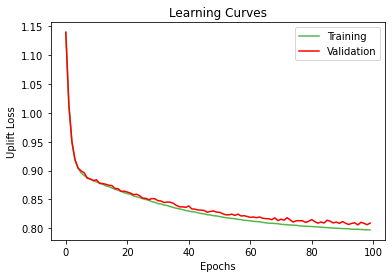

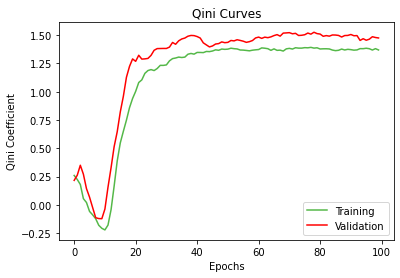

In [7]:
_,_ = uplift.fit(X_train, T_train, Y_train)   

#### Prediction and visualization

In [ ]:
# Uncomment the following if you want to load the "best" model based on the Qini coefficient obtained in the validation set
# import torch
# uplift.load_state_dict(torch.load("runs/Models/twincausal/256/Model_epoch_161.pth"))

In [8]:
pred = uplift.predict(X_test)

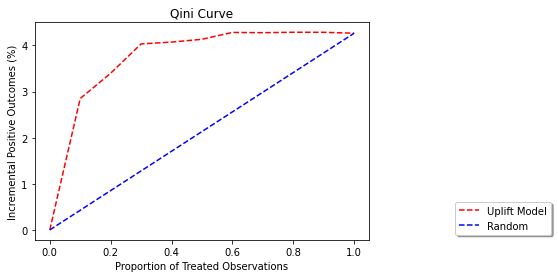

The Qini coefficient is: 1.4940898752537994


In [9]:
_, q = qini_curve(T_test, Y_test, pred, p_precision=1, plotit=True)
print('The Qini coefficient is:', q)

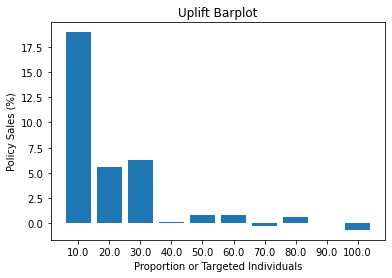

The Uplift correlation is: 0.73


In [10]:
_, tau = qini_barplot(T_test, Y_test, pred, p_precision=1, plotit=True)
print('The Uplift correlation is:', tau)